In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df=pd.read_csv("C:/Users/rprat/OneDrive/Desktop/MMA Documents/Revenue Management/singleitemSKU88.csv")

In [3]:
df.head()

,Week,Price,Price_1,Price_2,St
0,1,1.0,1.0,1.0,213.549265
1,2,1.0,1.0,1.0,213.931023
2,3,1.0,1.0,1.0,223.924599
3,4,1.0,1.0,1.0,195.420069
4,5,1.0,1.0,1.0,312.541057


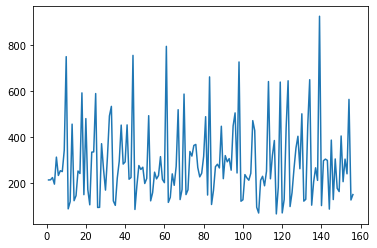

In [4]:
plt.plot(df.Week, df.St)

In [5]:
 df.isnull().sum()

Week       0
Price      0
Price_1    0
Price_2    0
St         0
dtype: int64

## Time Effect

In [6]:
#Add seasonality
df['Week_factor'] = pd.Categorical(pd.Series([i for i in range(1, 14) for _ in range(4)] * 3))

In [7]:
df=pd.get_dummies(data=df, columns=["Week_factor"])

In [8]:
import math
df["Price"]=[math.log(i) for i in df["Price"]]
df["Price_1"]=[math.log(i) for i in df["Price_1"]]
df["Price_2"]=[math.log(i) for i in df["Price_2"]]
df["St"]=[math.log(i) for i in df["St"]]

In [9]:
df

,Week,Price,Price_1,Price_2,St,Week_factor_1,Week_factor_2,Week_factor_3,Week_factor_4,Week_factor_5,Week_factor_6,Week_factor_7,Week_factor_8,Week_factor_9,Week_factor_10,Week_factor_11,Week_factor_12,Week_factor_13
0,1,0.000000,0.000000,0.000000,5.363868,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.000000,0.000000,0.000000,5.365654,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0.000000,0.000000,0.000000,5.411309,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0.000000,0.000000,0.000000,5.275151,1,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0.000000,0.000000,0.000000,5.744736,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,0.000000,0.000000,-0.105361,5.716780,0,0,0,0,0,0,0,0,0,0,0,1,0
152,153,0.000000,0.000000,0.000000,5.481322,0,0,0,0,0,0,0,0,0,0,0,0,1
153,154,-0.223144,0.000000,0.000000,6.333191,0,0,0,0,0,0,0,0,0,0,0,0,1
154,155,0.000000,-0.223144,0.000000,4.841734,0,0,0,0,0,0,0,0,0,0,0,0,1


## Model 1: Demand Prediction with Price from Week N

In [10]:
y=df["St"]
x=df.drop(["St","Price_1", "Price_2"], axis=1)

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33)

In [12]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()
model1=model1.fit(xtrain, ytrain)
ypred=list(model1.predict(xtest))

In [13]:
summary=pd.DataFrame({"Feature":x.columns, "Coefficients":model1.coef_})
print("Model Intercept:", model1.intercept_)
summary

Model Intercept: 5.388126992760056


,Feature,Coefficients
0,Week,-0.001390
1,Price,-3.483576
2,Week_factor_1,-0.367383
3,Week_factor_2,0.122826
4,Week_factor_3,-0.185842
5,Week_factor_4,-0.286049
6,Week_factor_5,-0.048129
7,Week_factor_6,0.231187
8,Week_factor_7,-0.039107
9,Week_factor_8,0.144963


In [14]:
from sklearn.metrics import r2_score
print('R2 Score:',round(r2_score(ytest, np.array(ypred)),3))

def mean_absolute_percentage_error(actual, predicted):
    # Convert to numpy arrays to ensure vectorized calculations
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate absolute percentage error
    absolute_percentage_error = np.abs((actual - predicted) / actual)

    # Calculate MAPE
    mape = np.mean(absolute_percentage_error) * 100

    return mape

print('MAPE Score:', round(mean_absolute_percentage_error(ytest, np.array(ypred)),3))

R2 Score: 0.425
MAPE Score: 5.889


The MAPE Score indicates that predictions from this model are off by about 6% from actual values

## Model 2: Demand Prediction with Price from Week N, N-1, N-2

In [15]:
from statsmodels.api import add_constant
y=df["St"]
x=df.drop(["St"], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33)

In [17]:
model2=LinearRegression()
model2=model2.fit(xtrain, ytrain)
ypred=list(model2.predict(xtest))

In [48]:
summary=pd.DataFrame({"Feature":x.columns, "Coefficients":model2.coef_})
print("Model Intercept:", model2.intercept_)
summary

Model Intercept: 5.595402125092375


,Feature,Coefficients
0,Week,0.000475
1,Price,-3.000442
2,Price_1,2.859929
3,Price_2,1.973298
4,Week_factor_1,-0.181547
5,Week_factor_2,-0.048308
6,Week_factor_3,0.022081
7,Week_factor_4,-0.111687
8,Week_factor_5,0.016484
9,Week_factor_6,0.209521


In [19]:
from sklearn.metrics import r2_score
print('R2 Score:',round(r2_score(ytest, np.array(ypred)),3))

def mean_absolute_percentage_error(actual, predicted):
    # Convert to numpy arrays to ensure vectorized calculations
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate absolute percentage error
    absolute_percentage_error = np.abs((actual - predicted) / actual)

    # Calculate MAPE
    mape = np.mean(absolute_percentage_error) * 100

    return mape

print('MAPE Score:', round(mean_absolute_percentage_error(ytest, np.array(ypred)),3))

R2 Score: 0.948
MAPE Score: 1.78


The MAPE Score indicates that predictions from this model are off by about 2% from actual values

## Influence of Prices on Demand

In [20]:
prices=df["Price"]
prices1=df["Price_1"]
prices2=df["Price_2"]

demand=pd.Series([math.exp(i*model2.coef_[0]) for i in prices])
demand1=pd.Series([math.exp(i*model2.coef_[1]) for i in prices1])
demand2=pd.Series([math.exp(i*model2.coef_[2]) for i in prices2])

prices=[math.exp(i) for i in prices]
prices1=[math.exp(i) for i in prices1]
prices2=[math.exp(i) for i in prices2]

price_demand_df=pd.DataFrame({"Price t":prices, "Demand t from Price t":demand,"Price t-1":prices1,"Demand t from Price t-1": demand1, "Price t-2": prices2,"Demand t from Price t-2": demand2})
price_demand_df

,Price t,Demand t from Price t,Price t-1,Demand t from Price t-1,Price t-2,Demand t from Price t-2
0,1.0,1.000000,1.0,1.000000,1.0,1.000000
1,1.0,1.000000,1.0,1.000000,1.0,1.000000
2,1.0,1.000000,1.0,1.000000,1.0,1.000000
3,1.0,1.000000,1.0,1.000000,1.0,1.000000
4,1.0,1.000000,1.0,1.000000,1.0,1.000000
...,...,...,...,...,...,...
151,1.0,1.000000,1.0,1.000000,0.9,0.739838
152,1.0,1.000000,1.0,1.000000,1.0,1.000000
153,0.8,0.999894,1.0,1.000000,1.0,1.000000
154,1.0,1.000000,0.8,1.953317,1.0,1.000000


From the table above, we can observe the following:

B0=-3.021225

This means that when the current price is lower than normal, demand will not change.

B1=2.913874

This means that when the price last week was lower than the normal price, demand will increase in the current week.

B2=1.984579

This means that when the price two weeks ago was lower than the normal price, demand will decrease in the current week.

### Question 4

In [21]:
case_for_model1=[[7,math.log(1),0,1,0,0,0,0,0,0,0,0,0,0,0]]
case_for_model2=[[7,math.log(1),math.log(0.8),math.log(0.8),0,1,0,0,0,0,0,0,0,0,0,0,0]]

print("Predicted Demand from Model 1:", round(math.exp(model1.predict(case_for_model1)),2))
print("Predicted Demand from Model 2:", round(math.exp(model2.predict(case_for_model2)),2))

Predicted Demand from Model 1: 244.99
Predicted Demand from Model 2: 87.52


### Question 5

The primary difference between model 1 and model 2 is that model 2 incorporates a price memory. It factors in the price of the item over the last two weeks to see if fluctuations in price from not far in the past affect demand in the present. This allows the model to account for the potential influence of price elasticity on demand.

This model would be particularly fitting to luxury items or consumer discretionary items. These are non-essential items that can be easily substituted for alternatives and are not purchased frequently to begin with - meaning consumers can afford to wait for better prices. These items include high-end clothing, specialty food products, and even cars. Essential items like milk, gasoline, or electricity are less susceptible to drastic changes in demand from price fluctuations